<a href="https://colab.research.google.com/github/mariatabi/cv-tasks/blob/main/try6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

All:  400
190
(2000, 2000, 3)
{None: 358, '8': 8, '-': 31, 'B': 3}
Percent: 10.5


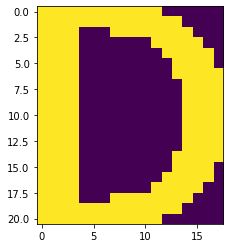

In [7]:
def recognize(region):
  if np.all(region.image):
    return "-"
  if lakes(region) == 2:
    if has_vline(region):
      return "B"
    else:
      return "8"
  return None

def lakes(region):
  b = ~region.image # Инвертирование
  lb = label(b)
  regs = regionprops(lb)
  count = 0
  for reg in regs:
    on_bound = False 
    for y,x in reg.coords:
      if y == 0 or x == 0 or y == reg.image.shape[0] - 1 or x == reg.image.shape[1] - 1:
        on_bound = True
        break
    if not on_bound:
      count += 1
  return count

def has_vline(region):
  lines = np.sum(region.image,0) // region.image.shape[0]
  return 1 in lines


image = plt.imread("symbols.png")
binary = np.sum(image, 2)
binary[binary > 0] = 1 

labeled = label(binary)
print("All: ", np.max(labeled))

regions = regionprops(labeled)

print(regions[0].area)
print(image.shape)

d = { }

for region in regions:
  symbol = recognize(region)
  if symbol not in d:
    d[symbol] = 0
  d[symbol] += 1

print(d)
print("Percent:" ,round((1. - d[None] / sum(d.values())) *100,2))


plt.imshow(regions[60].image)
plt.show()

#plt.imshow(regions[0].image, cmap = "gray")
#plt.show()